In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")

In [509]:
theYear = 2021
#PGE SCE SDGE
region="SDGE"
year = pd.DataFrame()
for i in range(12):
    theMonth = i+1
    if(theMonth < 10):
        theMonth = "0"+str(theMonth)
    else:
        theMonth = str(theMonth)
    month = pd.read_csv("marginal_emission/SGIP_CAISO_{}/SGIP_CAISO_{}_{}-{}_ALL_MOER_VERSIONS.csv".format(region,region,theYear,theMonth),parse_dates=['timestamp'])
    year = pd.concat([year, month], axis=0)

In [510]:
print(month.dtypes)

timestamp           datetime64[ns, UTC]
MOER version 2.0                float64
MOER version 1.0                float64
dtype: object


<AxesSubplot:xlabel='timestamp'>

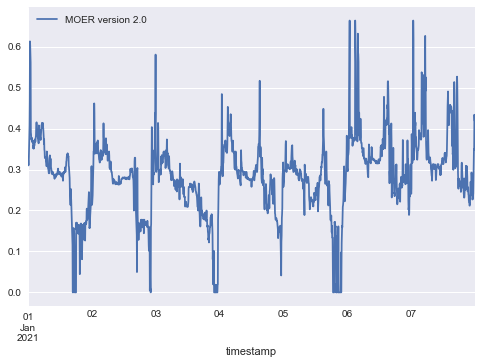

In [511]:
q1 = year[0:288*7]
q1.plot(x="timestamp", y="MOER version 2.0")

In [512]:
def isLeapYr(theYear):
    if ((theYear % 4 == 0) and (theYear % 100 != 0)) or (theYear % 400 == 0):
        return 366
    else:
        return 365

In [513]:
# Create Heatmap
if isLeapYr(theYear)==True:
    day = 366
else:
    day = 365
time = 12*24
matrix = np.zeros(day*time,dtype=float)

MOERV2 = 1

plt.figure(figsize=(time,day))

for i in range (day):
    for j in range (time):
        MOER = year.iloc[int(i*time+j),MOERV2]
        #print(i*time+j)
        #print(MOER)
#         #print(year[i*time+j:i*time+j+1]['MOER version 2.0'].astype(float))
#         #MOER = year[i*time+j:i*time+j+1]['MOER version 2.0'].astype(float)
#         MOER = year[i*time+j:i*time+j+1]['MOER version 2.0']
#         MOER = str(MOER)[5:13]
#         print(MOER)
#         if(MOER=='0.0'):
#             MOER = 0
#         MOER = float(MOER)
        matrix[i*time+j] = MOER

<Figure size 20736x26280 with 0 Axes>

In [514]:
matrix = matrix.reshape(day,time)
# print(matrix)

In [515]:
theIndex = np.zeros(time,dtype=object)
for i in range(time):
    minute = (i*5)%60
    if minute < 10:
        minute = "0"+str(minute)
    hour = int(i/12)
    if hour < 10:
        hour = "0"+str(hour)
    
    hour = str(hour)
    minute = str(minute)
    timeStr = hour+":"+minute
    theIndex[i] = timeStr
    
theColumn = np.zeros(day,dtype=object)
if isLeapYr(theYear)==True:
    month_arr = [31,29,31,30,31,30,31,31,30,31,30,31]
else:
    month_arr = [31,28,31,30,31,30,31,31,30,31,30,31]

month_idx = 1
day_elapse = 1
for i in range(day):
    if day_elapse > month_arr[month_idx-1]:
        month_idx += 1
        day_elapse = 1
        
    if month_idx < 10:
        month = "0"+(str(month_idx))
    else:
        month = str(month_idx)
    
    if day_elapse < 10:
        day_idx = "0"+(str(day_elapse))
    else:
        day_idx = str(day_elapse)
        
    theColumn[i] = (str(theYear)) +"-"+ month +"-"+ day_idx
    day_elapse += 1

theColumn = theColumn.tolist()
theIndex = theIndex.tolist()
# print(theIndex)
# print(theColumn)

In [516]:
matrix = pd.DataFrame(matrix, columns=theIndex,index=theColumn)
matrix.T

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
00:00,0.322809,0.213564,0.317649,0.263471,0.257682,0.298744,0.253363,0.311516,0.159638,0.326647,...,0.344887,0.346921,0.259525,0.234505,0.255586,0.270828,0.390544,0.322733,0.325128,0.320920
00:05,0.310040,0.218137,0.294333,0.280666,0.264194,0.301037,0.240694,0.290462,0.163209,0.313694,...,0.344887,0.323130,0.262058,0.195769,0.251285,0.270950,0.389969,0.310597,0.326608,0.321421
00:10,0.311791,0.228279,0.294458,0.278073,0.272670,0.295749,0.253363,0.304814,0.180246,0.291930,...,0.353224,0.326695,0.277117,0.234505,0.250374,0.302424,0.398592,0.313586,0.328835,0.324200
00:15,0.329586,0.237303,0.294338,0.280666,0.275217,0.299979,0.386396,0.316246,0.215444,0.331131,...,0.362598,0.334627,0.285055,0.236314,0.246251,0.305230,0.392224,0.319383,0.331889,0.328303
00:20,0.357064,0.267179,0.303378,0.285023,0.292254,0.336289,0.353464,0.326993,0.233755,0.395504,...,0.405166,0.337502,0.306649,0.262545,0.246251,0.328650,0.404710,0.323437,0.338215,0.328237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:35,0.216670,0.350922,0.237261,0.205789,0.303631,0.239910,0.320550,0.200145,0.297756,0.577563,...,0.381511,0.310109,0.255099,0.302842,0.260472,0.397951,0.314812,0.354376,0.315629,0.256177
23:40,0.254726,0.437113,0.275343,0.276719,0.317053,0.290812,0.350159,0.214572,0.339383,0.607410,...,0.419977,0.315032,0.259622,0.321384,0.281733,0.415830,0.349083,0.357266,0.322534,0.260419
23:45,0.303378,0.405928,0.292624,0.291716,0.332527,0.307201,0.348663,0.218517,0.499788,0.663750,...,0.419611,0.320992,0.320145,0.321576,0.320058,0.425326,0.382869,0.403878,0.333556,0.270783
23:50,0.308209,0.437113,0.294458,0.291716,0.382497,0.312482,0.433809,0.220564,0.488070,0.663750,...,0.419507,0.311379,0.328703,0.354444,0.342912,0.433078,0.382869,0.403876,0.344277,0.326669


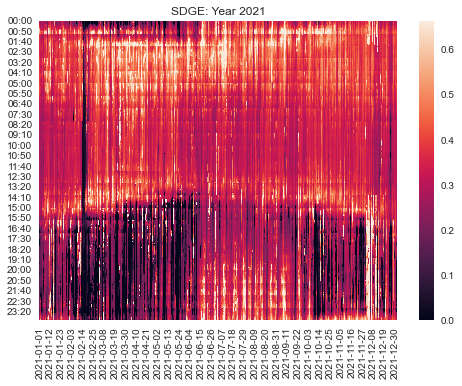

In [517]:
# month.plot(x="timestamp", y=["MOER version 2.0", "MOER version 1.0"])
yearplt = plt.axes()
heat_map = sns.heatmap(matrix.T)
yearplt.set_title('{}: Year {}'.format(region,theYear))
plt.savefig("./plots/{}/MOER_heatmap_{}_{}.png".format(region,region,theYear))
plt.show()

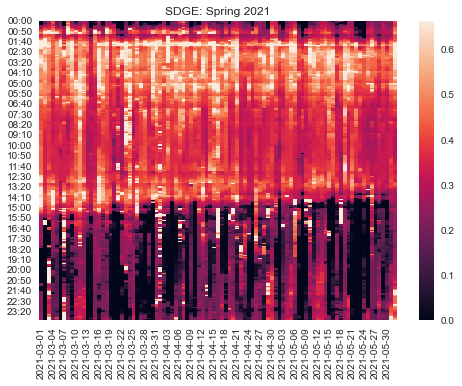

In [518]:
# Analyze Different Season
# spring = df2[59:152].mean().iloc[1:]
# summer = df2[152:243].mean().iloc[1:]
# autumn = df2[243:334].mean().iloc[1:]
# winter = pd.concat([df2[334:365],df2[0:59]]).mean().iloc[1:]

spring = matrix.loc[:][59:152].T
summer = matrix.loc[:][152:243].T
autumn = matrix.loc[:][243:334].T
winter = pd.concat([matrix[334:365],matrix[0:59]]).T

springPlt = plt.axes()
heat_map_spring = sns.heatmap(spring)
springPlt.set_title('{}: Spring {}'.format(region,theYear))
plt.savefig("./plots/{}/MOER_heatmap_{}_{}_spring.png".format(region,region,theYear))
plt.show()


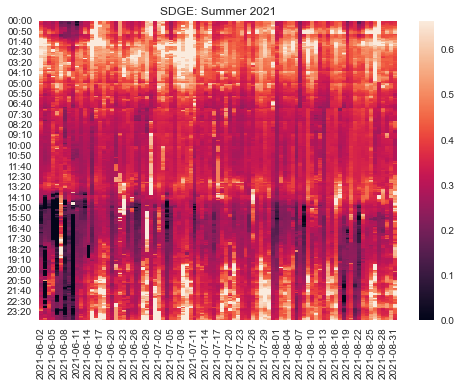

In [519]:
summerPlt = plt.axes()
summerPlt.set_title('{}: Summer {}'.format(region,theYear))
heat_map_summer = sns.heatmap(summer)
plt.savefig("./plots/{}/MOER_heatmap_{}_{}_summer.png".format(region,region,theYear))
plt.show()

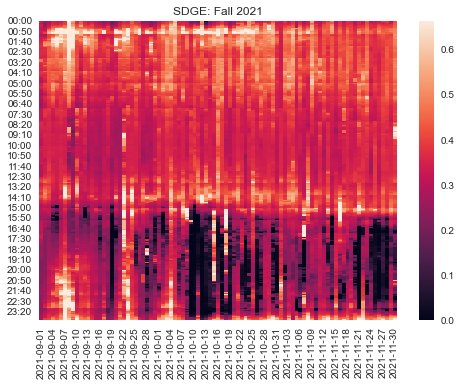

In [520]:
fallPlt = plt.axes()
heat_map_autumn = sns.heatmap(autumn)
fallPlt.set_title('{}: Fall {}'.format(region,theYear))
plt.savefig("./plots/{}/MOER_heatmap_{}_{}_fall.png".format(region,region,theYear))
plt.show()

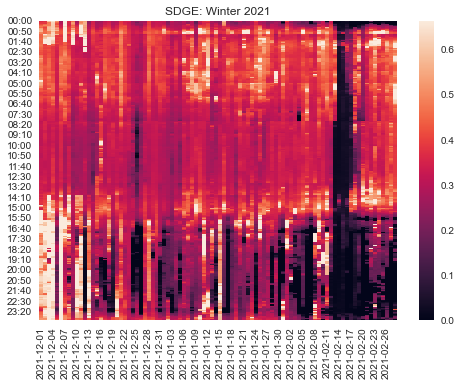

In [521]:
winterPlt = plt.axes()
heat_map_winter = sns.heatmap(winter)
winterPlt.set_title('{}: Winter {}'.format(region,theYear))
plt.savefig("./plots/{}/MOER_heatmap_{}_{}_winter.png".format(region,region,theYear))
plt.show()